<a href="https://colab.research.google.com/github/ghgv/Neural_net/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rows= 4 
z1: 
0.7606051344021186
z2: 
0.7606051344021186
z1: 
0.8250076181089103
z2: 
0.8250076181089103
z1: 
0.8278016800415943
z2: 
0.8278016800415943
z1: 
0.89536308425812
z2: 
0.89536308425812
z1: 
0.8587797282503502
z2: 
0.8587797282503502
z1: 
0.9071824938890969
z2: 
0.9071824938890969
z1: 
0.9003346508622149
z2: 
0.9003346508622149
z1: 
0.9462714041689954
z2: 
0.9462714041689954
z1: 
0.9088427000426677
z2: 
0.9088427000426677
z1: 
0.9440579558267396
z2: 
0.9440579558267396
z1: 
0.9356749045410729
z2: 
0.9356749045410729
z1: 
0.9679700578091949
z2: 
0.9679700578091949
z1: 
0.9357311378607013
z2: 
0.9357311378607013
z1: 
0.962384872788075
z2: 
0.962384872788075
z1: 
0.9546099855164241
z2: 
0.9546099855164241
z1: 
0.9786793665567006
z2: 
0.9786793665567006
z1: 
0.9515656692742783
z2: 
0.9515656692742783
z1: 
0.9726459641703368
z2: 
0.9726459641703368
z1: 
0.9658345696451346
z2: 
0.9658345696451346
z1: 
0.9846744381325226
z2: 
0.9846744381325226
z1: 
0.9616886153816642
z2: 
0.961688

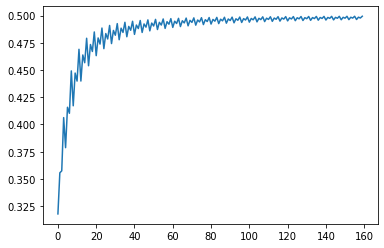

[[6.09076394]
 [6.09076394]]
0.9977414337281316
0.9977414337281316


In [71]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid=0
binary_cross_entropy=1

W0=1
B1=1

W= np.array([[0.1 , 0.3, 0.4, 1],  
             [0.1 , 0.3, 0.4, 1]])

X =np.array([[0.1, 0.3, 0.14],
             [0.2, 0.15, 0.76],
             [0.096, 0.64, 0.05],
             [0.073, 0.6, 0.8]])
# 
D = np.array([[1,0,1,0],  #even
              [0,1,0,1]]) #odd

(a,b)=X.shape
#add a column of 1 to make up for the bias
bias = np.array([[1], [1], [1], [1]]) 

X=np.append(X,bias,axis=1) 
z=0.0000001
rate=1
Error=[]
print("rows= %i " % a)
for k in range(40):
    #print("Epoch[%i] " %k)
    for i in range(b+1):
        
        W1=W[0,:]
        XT=X.T
        #print the different entries
        #print("Xs (is transposed):")
        #print(XT)
        #print("Ws:")
        #print(W)
        
        h1=XT[:,i].dot(W[0,:].T)
        h2=XT[:,i].dot(W[1,:].T)
        #print("h1: ")
        #print(np.sum(h1))
        #print("h2: ")
        #print(np.sum(h2))
        z1=1/(1+np.exp(-np.sum(h1)))
        z2=1/(1+np.exp(-np.sum(h2)))
        print("z1: ")
        print(z1)  
        print("z2: ")
        print(z2)  
        if (sigmoid==1):
          #print("D[0,%i]: " % i)
          #print(D[0,0])  
          dp1dz1=D[0,i]-z1
          #print("dpdz1= ")
          #print(dp1dz1)
          dz1dp1=(z1*(1-z1))
          #print("dz1dp1")
          #print(dz1dp1)

          #print("D[1,%i]: " % i)
          #print(D[1,0])  
          dp2dz2=D[1,i]-z2
          #print("dpdz2= ")
          #print(dp2dz2)
          dz2dp2=(z2*(1-z2))
          #print("dz2dp2")
          #print(dz2dp2)
        if (binary_cross_entropy==1):
          dp1dz1=-0.5*((D[0,i]*np.log(z1)+(1-D[0,i])*np.log(1-z1))+(D[1,i]*np.log(z2)+(1-D[1,i])*np.log(1-z2)))
          dp2dz2=-0.5*((D[0,i]*np.log(z1)+(1-D[0,i])*np.log(1-z1))+(D[1,i]*np.log(z2)+(1-D[1,i])*np.log(1-z2)))
          dz1dp1=(z1*(1-z1))
          dz2dp2=(z2*(1-z2))


        #print("XT[%i]" % i )
        ##print(XT[0,i])
        #print(XT[1,i])
        #print(XT[2,i])

        dp1dw11=dp1dz1*dz1dp1*XT[0,i]
        dp1dw12=dp1dz1*dz1dp1*XT[1,i]
        dp1dw13=dp1dz1*dz1dp1*XT[2,i]
        dp1dw14=dp1dz1*dz1dp1
        
        dp2dw21=dp2dz2*dz2dp2*XT[0,i]
        dp2dw22=dp2dz2*dz2dp2*XT[1,i]
        dp2dw23=dp2dz2*dz2dp2*XT[2,i]
        dp2dw24=dp2dz2*dz2dp2


        Wp=np.array([[dp1dw11, dp1dw12, dp1dw13, dp1dw14],
                     [dp2dw21 ,dp2dw22 ,dp2dw23 ,dp2dw24]])
        W=W+rate*Wp
        #print("New W:")
        #print(W)
        error=0.5*(D[0,i]-z1)*(D[0,i]-z1)+0.5*(D[1,i]-z2)*(D[1,i]-z2)
        #print("Error %f" % error)
        Error.append(error)
plt.plot(Error)
plt.show()

X_test=np.array([[0.096, 0.64, 0.05,1]])
c=W.dot(X_test.T)
print(c)
print(1/(1+np.exp(-c[0,0])))
print(1/(1+np.exp(-c[1,0])))
